In [1]:
from IPython.display import Markdown, display
display(Markdown(open("./SM_header.md", "r").read()))

Copyright © 2025-2026 Université Paris Cité

Author: [Guillaume Rousseau](https://www.linkedin.com/in/grouss/), Laboratoire Matières et Systèmes Complexes, UMR 7057, CNRS and Université Paris Cité, CNRS, UMR7057, 10 rue Alice Domon et Léonie Duquet, F-75013, Paris cedex 13, France (email: guillaume.rousseau@u-paris.fr)

This archive contains the supplemental materials and replication package associated with the preprint, "*Empirical Growing Networks vs Minimal Models: Evidence and Challenges from Software Heritage and APS Citation Datasets*", available on [arXiv](https://arxiv.org/abs/2501.10145) and [ssrn](http://ssrn.com/abstract=5191689).

**The latest version of the preprint (timestamped arXiv:2501.10145v5) is downloadable here https://arxiv.org/pdf/2501.10145**

The current version of the Python scripts and associated resources is available on the [author's GitHub page](https://github.com/grouss/growing-network-study).

This work is currently licensed under the [Creative Commons CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0).

To give appropriate credit and cite this work ([BibTeX entry](./rousseau2025temporal)):
Rousseau, G. (2025). *Empirical Growing Networks vs Minimal Models: Evidence and Challenges from Software Heritage and APS Citation
Datasets* [Preprint]. arXiv:2501.10145. https://arxiv.org/abs/2501.10145

 
# A) Replication Packages

[Open the Replication Package notebook related to the datasets.](./Replication_Package_Datasets.ipynb)

[Open the Replication Package notebook related to the figures.](./Replication_Package_Figures.ipynb)

# B) QuickStart Guide

[Open the QuickStart Guide notebook](./SM00_QuickStart.ipynb)

# C) Table of Contents

- 1. [Function Definitions](./SM01_Functions.ipynb)
- 2. [Dataset Import](./SM02_DatasetImport.ipynb)
- 3. [Building the Transposed Graph](./SM03_BuildingTransposedGraph.ipynb)
- 4. [Temporal Information Quality and Summary Statistics](./SM04_TemporalInformationMainStats.ipynb)
- 5. [Growth Relationship Between Nodes and Edges](./SM05_GrowingRules.ipynb)
- 6. [Topological Partitioning($RV$ Nodes)](./SM06_TopologicalPartitioning.ipynb)
- 7. [In-Degree and Out-Degree Distributions Over Time](./SM07_DegreeDistributionOverTime.ipynb)
- 8. [Distribution Tail Analysis](./SM08_DistributionTailAnalysis.ipynb)
- 9. [Temporal Partitioning](./SM09_TemporalPartitioning.ipynb)
- 10. [Building the temporal graph $O-(RV/RL)-O$](./SM10_DerivedGrowingNetwork.ipynb)
- 11. [Building the $TSL$ graph](./SM11_TSLPartitioning.ipynb)
- 12. [Price / Directed Barabási–Albert Model Use Case](./SM12_BarabasiAlbertUseCase.ipynb)
- 13. [APS citation network](./SM13_APSCitationNetwork.ipynb)
- 14. [Generic Report Template](./SM14_GenericReport.ipynb)


**NB :** As of 2026/01/31, the QuickStart guide, the replication packages, and SM01 to SM14 are available. The Python scripts are also provided under local_utils directory, but they are not in their final form and should be considered an alpha release.

The graphs used in the study are available in a distinct Zenodo Deposit 10.5281/zenodo.15260640 ($\sim50$ Go), including the main graph (2+ billions of nodes, $\sim4$ billions of edges), and two derived graphs ($\sim150$ millions nodes and edges).

The APS Citation Dataset (2022 export) has been included in the study.

More release notes are available in the [dedicated notebook](./SM_ReleaseNote.ipynb).

In [3]:
%load_ext autoreload
%autoreload 2

import importlib,sys,local_utils
from local_utils import *

print("___ Import data from graphpath=",config.graphpath)
print("___ Export data to exportpath=",config.exportpath)   
DisplayCopyrightInfo()


___ Import data from graphpath= ./ImportData/
___ Export data to exportpath= ./ExportData/
--------------------------------------------------------------------------------
Copyright 2025 Université Paris Cité, France 
Author: Guillaume Rousseau, MSC Lab, Physics Department, Paris, France 

(https://www.linkedin.com/in/grouss/)

This archive contains the supplemental materials and replication package associated with the preprint available on :
- arXiv (https://arxiv.org/abs/2501.10145)
- SSRN  (http://ssrn.com/abstract=5191689

Current version of python scripts and associated ressources are available on author's github page
(https://github.com/grouss/growing-network-study)

This work is currently licensed under CC BY-NC-SA 4.0
(https://creativecommons.org/licenses/by-nc-sa/4.0)
--------------------------------------------------------------------------------



# 12 APS Citation Network

The APS Data Sets for Research (https://journals.aps.org/datasets) is a dataset made available on request by the American Physical Society. It includes ~130 years of meta data about paper published over year in one of the APS journal, and information about reference to papers published in one of the APS journal. It does not include reference to article published in other journal than those of the APS journal.

We started from the 2022 APS dataset, which includes paper and citation up to the end of 2022.

It nearly includes 725,157 publications, but only 720,234 with a valid timestamp, and 9,758,055 associated citation within publications in APS journals.

In the scope of this study, we have done a straightforward import of the data, without making for instance any distinction between publication from différent journal, or including "author" information (each author could be represented as a Node of the type "Author"), even if it would have made sens in the scope of a more detailed study.

We simply provide the following table with repartition of articles from the different APS journal, available in the dataset. 



## a) Related Work

We refer here to some of the prior studies:
- de Solla Price, D. J. (1976). “A General Theory of Bibliometric and Other Cumulative Advantage Processes.” Journal of the American Society for Information Science, 27(5), 292–306. https://doi.org/10.1002/asi.4630270505
- Krapivsky, P. L., & Redner, S. (2001). *Organization of growing random networks*. Physical Review E, 63(6), 066123. https://doi.org/10.1103/PhysRevE.63.066123  
- Redner, S. (2005). *Citation statistics from 110 years of Physical Review*. Physics Today, 58(6), 49–54. https://doi.org/10.1063/1.1996475  
- Sheridan, P., & Onodera, T. (2018). *A Preferential Attachment Paradox: How Preferential Attachment Combines with Growth to Produce Networks with Log-normal In-degree Distributions*. Scientific Reports, 8, 1–11. https://doi.org/10.1038/s41598-018-21133-2  

These studies analyze the APS citation dataset, a subset thereof, or more generally discuss the role of preferential attachment/cumulative advantage processes in the scope of citation network.

One key advantage of this dataset is that its growth dynamics are relatively simple to interpret: nodes and edges are created once and for all, and new (directed) edges typically connect newly introduced nodes to preexisting ones.

Furthermore, the simplicity of the underlying growth mechanism supports strong assumptions about the presence of **aging effects**, which are known to induce **sublinear preferential attachment** and, under certain conditions, result in **non–scale-free in-degree distributions**, in particular **log-normal** distributions.

For instance, *Supplementary Note 3* of Sheridan et al. (2018) provides a formal proof that incorporating aging into the growth model leads to an in-degree distribution that asymptotically follows a log-normal law for large degrees. However, this result relies on a key assumption:
> *"The mean value $m$ of the $m_t$'s is constant over time with finite variance as $t$ becomes larger."*

We will not delve into the implications of this assumption here, nor discuss in detail its consequences for the analysis of this particular dataset — a topic we leave for future work. Nevertheless, we emphasize that this assumption is representative of commonly accepted hypotheses when comparing the structural properties of real-world citation networks with minimal growth models.


## b) Exported APS Citation dataset

The request to acces the full dataset and the construction of the associated growing network is straightforward (data-requests@aps.org). 
We only provide here the minimal dataset derived from the APS citation dataset to fulfill the replication package requirement 

In [6]:
nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH,DatasetName=LoadAllArrayAPS()  
# SM14 for explanation about the following parameters

yearlongdash=[2023]
yearplain=[]
yeardash=[1960,1985]

YearBegin=1900
YearEnd=2025

YearSlice=5
YearList=[1960,1980,2000,2010,3000]


Loaded : ./ImportData/nodes_APS_20250618.pkl
Loaded : ./ImportData/edges_APS_20250618.pkl
Loaded : ./ImportData/nodesad_APS_20250618.pkl
Loaded : ./ImportData/d_APS_20250618.pkl
DatasetName APS derived P-P
DatasetDescription From APS 2022
DatasetDoi 
From EPOCH 1900-01-01


In [13]:
# check for autocitation (selfloop)
# check for duplicated citation
selfloop=0
duplicated=0
for i in range(Nnodes):
    edgesList=edges[nodes[i]:nodes[i+1]]
    if i in edgesList:
        selfloop+=1
    if len(set(edgesList))!=len(edgesList):
        duplicated+=1
        
print("selfloop",selfloop)
print("duplicated",duplicated)

selfloop 0
duplicated 0


**NB** In the original APS dataset, few publications are references before "1900-01-01"

In [14]:
statsoutput=DisplayTypeStats(nodes,edges,d)    
print("d =>",d)
print("EPOCH =>",EPOCH)

GetNodesTypesArray [Elapse time : 0.0 (s)]
___ P     :         720,235 (100.0%)
____________________________________
___ Total :         720,235 (100.0%)

GetEdgesTypesArray [Elapse time : 0.0 (s)]
___ P>P   :       9,757,851 (100.0%)
____________________________________
___ Total :       9,757,851 (100.0%)

d => {'PindexMin': 0, 'PindexMax': 720234, 'P': 720235}
EPOCH => 1900-01-01


---

**NB:** A discussion is provided below.

## c) Stats over "time"


In [15]:
Rebuild=True
Fsave=True
if Rebuild:
    # nodes creation over time (per type per month)
    stat={}
    ti=time.time()
    stat=BuildNodesTimeStampHisto(nodes,edges,nodesad,d,stat=stat,EPOCH=EPOCH)
    tf=time.time()
    print("BuildNodesTimeStampHisto Elapse ",np.round(tf-ti),"(s)")
    print(stat.keys())
    # BuildNodesTimeStampHisto Elapse  144.0
    # edges creation over time (per type per month)
    ti=time.time()
    stat=BuildEdgesTimeStampHisto(nodes,edges,nodesad,d,stat=stat,EPOCH=EPOCH,Verbose=True)
    tf=time.time()
    print("BuildEdgesTimeStampHisto Elapse ",np.round(tf-ti),"(s)")
    print(stat.keys())
    filename=exportpath+"stat_nodes_edges_APS_1900_2030.pkl"
    if Fsave:
        pickle.dump(stat,open(filename,"wb"))


BuildNodesTimeStampHisto Elapse  0.0 (s)
dict_keys(['P'])
edgesTSM 1/2  0.0 (s)
edgesTSM 2/2  0.0 (s)
edgestype 1/1  0.0 (s)
TSM2stat 1/1  0.0 (s)
BuildEdgesTimeStampHisto Elapse  0.0 (s)
dict_keys(['P', 'P>P'])


./ExportData/stat_nodes_edges_APS_1900_2030.pkl


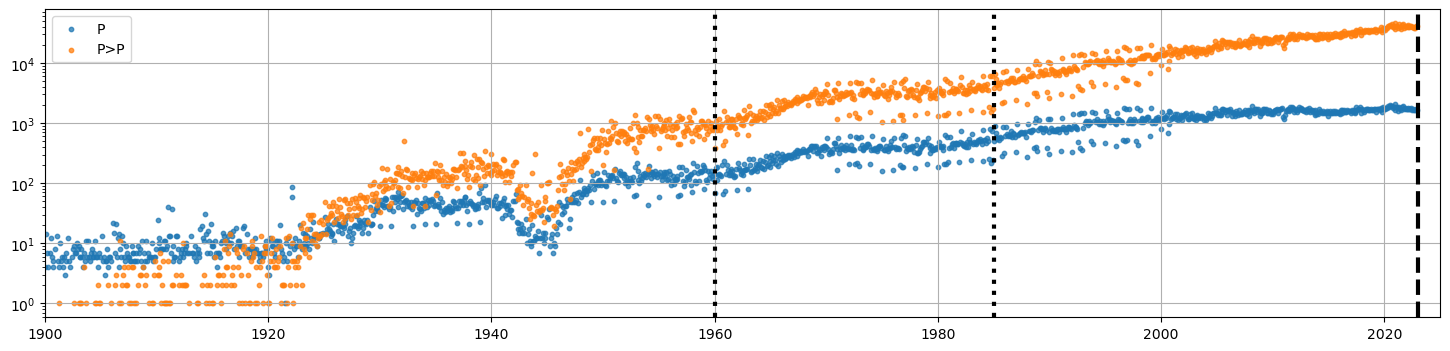

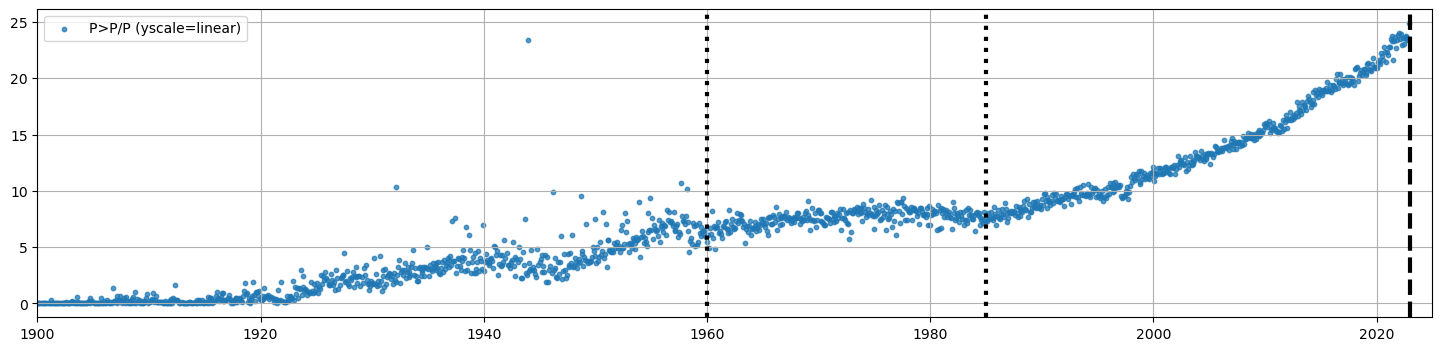

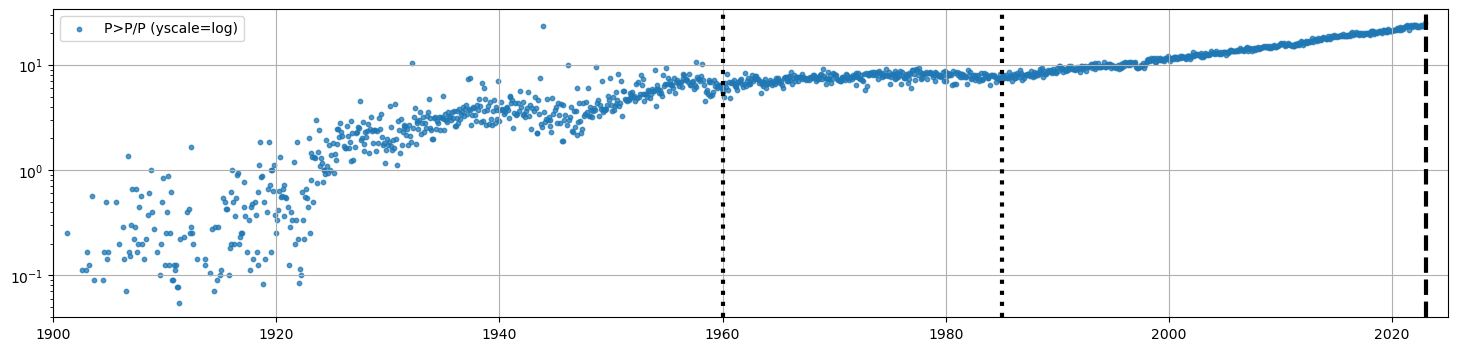

In [16]:
DisplayStat=True
if DisplayStat:
    filename=exportpath+"stat_nodes_edges_APS_1900_2030.pkl"
    print(filename)
    stat=pickle.load(open(filename,"rb"))
    # displaying all curves
    x=np.arange(1634)/12+EPOCH2Epoch(EPOCH)
    def VerticalLinesLocal(
        yearplain=[2017,2018,2019,2020,2021],
        yeardash=[2012,2013,2014,2015,2016],
        yearlongdash=[2021+(3-1)/12]
):
        lw=3;alpha=0.5
        #plt.xlim(1990,2030)
        for year in yearplain:
            plt.axvline(x=year,color='k',alpha=alpha,lw=lw)
        for year in yearlongdash:
            plt.axvline(x=year,color='k',linestyle='--',alpha=1,lw=lw)
        for year in yeardash:
            plt.axvline(x=year,color='k',linestyle=':',alpha=1,lw=lw)
        plt.grid()
        plt.legend()

    plt.figure(figsize=(18,4))
    for key,value in stat.items():
        if np.sum(value[1:-1])!=0:
            plt.scatter(x,value,s=10,label=key,alpha=0.75)
    plt.yscale('log')
    plt.xlim(YearBegin,YearEnd)
    VerticalLinesLocal(yearlongdash=yearlongdash,yearplain=yearplain,yeardash=yeardash)
    plt.show()

    for yscale in ["linear","log"]:
        plt.figure(figsize=(18,4))
        for key,value in stat.items():
            if np.sum(value[1:-1])!=0 and ">" in key:
                length=(len(key)-1)//2
                plt.scatter(x,value/stat[key[-length:]],s=10,label=key+"/"+key[-length:]+" (yscale="+yscale+")",alpha=0.75)
        VerticalLinesLocal(yearlongdash=yearlongdash,yearplain=yearplain,yeardash=yeardash)
        plt.xlim(YearBegin,YearEnd)

        plt.yscale(yscale)
        plt.show()

---

**NB:** A discussion is provided below.

1900.0
Edge Source/Target TS Building  0.11 (s)
!! Excluding SelfLoops (if they exist)
Mask Building  0.07 (s)
9,757,851 valid edges over a total of 9,757,851 i.e. 100.0 % of valid edges
Building DeltaTS  0.06 (s)
Applying Mask  0.24 (s)
Building edge type array and applying mask 0.03 (s)
Start for edge type : P>P


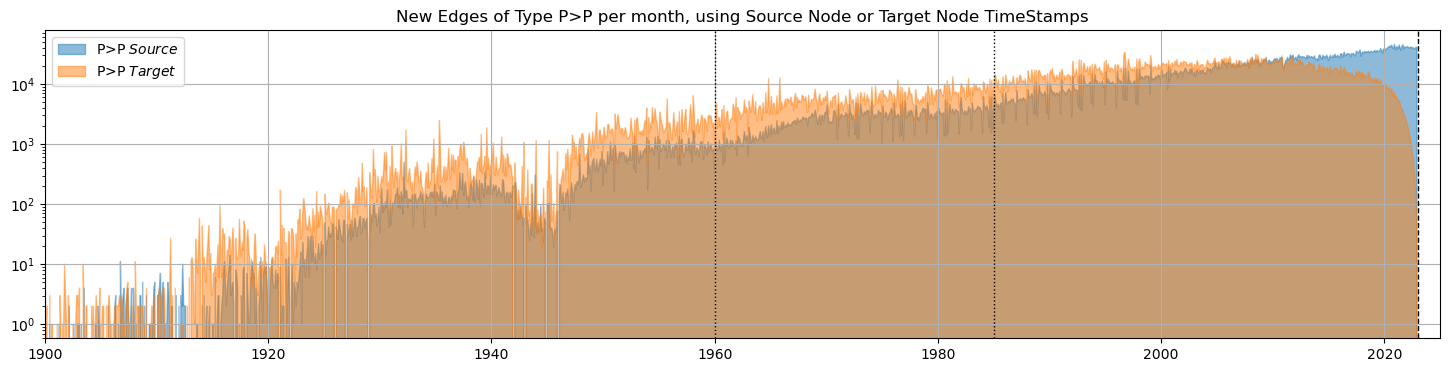

!! Excluding SelfLoops (if they exist)
            TS <= -1 Year               35 i.e   0.00 %
-1 Year  <  TS <= -1 Month             190 i.e   0.00 %
-1 Month <  TS <= -1 Week              145 i.e   0.00 %
-1 Week  <  TS <= -1 Day                50 i.e   0.00 %
-1 Day   <  TS <= -1 Hour                0 i.e   0.00 %
-1 Hour  <  TS <= -1 Mn                  0 i.e   0.00 %
-1 Mn    <  TS <= -1 S                   0 i.e   0.00 %
................................................................................
P>P     Total TS <  0 S (negative)             420 i.e   0.00 %
................................................................................
P>P     ***** TS == 0 S (null)              19,478 i.e   0.20 %
................................................................................
P>P     Total TS >  0 S (positive)       9,737,953 i.e  99.80 %
................................................................................
 1 S     <= TS <   1 Mn                  0 i.e   0.00

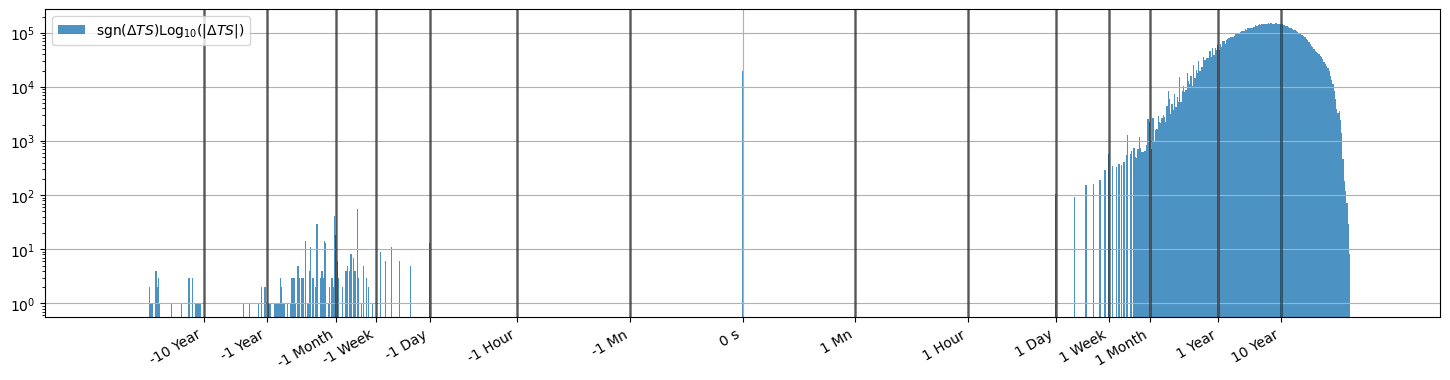

End for edge type : P>P


In [17]:
if DisplayStat:
    print(EPOCH2Epoch(EPOCH))
    ExcludingSelfLoop=True
    ti=time.time()
    sourcearrayTS=GetSourceEdgeTimeStamp(nodes,edges,nodesad,d)
    targetarrayTS=GetTargetEdgeTimeStamp(nodes,edges,nodesad,d)
    tf=time.time()
    print("Edge Source/Target TS Building ",np.round(tf-ti,2),"(s)")
    # we exclude edges where timestamp==0 or timestamp==2**32-1
    ti=time.time()
    mask=np.logical_and(np.logical_and(sourcearrayTS!=0,sourcearrayTS!=2**32-1),np.logical_and(targetarrayTS!=0,targetarrayTS!=2**32-1))
    # one excludes selfloop
    if ExcludingSelfLoop:
        print("!! Excluding SelfLoops (if they exist)")
        sourceEdges=GetSourceEdge(nodes)
        mask=np.logical_and(mask,sourceEdges!=edges)
    tf=time.time()
    print("Mask Building ",np.round(tf-ti,2),"(s)")
    valid_edges=np.sum(mask)
    print(f'{valid_edges:,} valid edges over a total of {edges.shape[0]:,} i.e. {np.round(valid_edges/edges.shape[0]*100,2)} % of valid edges')
    # ! Timestamp are uint32 (must convert to int before diff)
    # deltaTS still in second (negative or positive)
    ti=time.time()
    sourcearrayTS=sourcearrayTS[mask]
    targetarrayTS=targetarrayTS[mask]
    deltaTS=sourcearrayTS.astype('int')-targetarrayTS.astype('int')
    tf=time.time()
    print("Building DeltaTS ",np.round(tf-ti,2),"(s)")
    # convert s since EPOCH to Months since EPOCH
    ti=time.time()
    sourcearrayTS=timestampsarray2yearmonth(sourcearrayTS,EPOCH=EPOCH)
    targetarrayTS=timestampsarray2yearmonth(targetarrayTS,EPOCH=EPOCH)
    tf=time.time()
    print("Applying Mask ",np.round(tf-ti,2),"(s)")
    ti=time.time()
    arraytype,encoding=GetEdgesTypesArray(nodes,edges,d)
    arraytype=arraytype[mask]
    tf=time.time()
    print("Building edge type array and applying mask",np.round(tf-ti,2),"(s)")

    for i,Etype in enumerate(encoding):
        mask_type=arraytype==i

        if np.sum(mask_type)!=0:
            print("Start for edge type :",Etype)
            PlotTSoverTimeEdges(sourcearrayTS[mask_type],targetarrayTS[mask_type],Etype,EPOCH=EPOCH,
                                Xmin=YearBegin,Xmax=YearEnd,
                               yearplain=yearplain,yeardash=yeardash,yearlongdash=yearlongdash)
            if ExcludingSelfLoop :
                print("!! Excluding SelfLoops (if they exist)")
            DisplayTSstat(deltaTS[mask_type],Etype)
            PlotTSHisto(deltaTS[mask_type],Etype)
     

**Comment**: 
- By construction only edges existing in the initial condition can have $\Delta TS<0$
- The shape of this histogram is highly characteristic of the growing regime and can be compared to that obtained from minimal models.

---

**NB:** A discussion is provided below.

## d) In-degree distribution over "time"

In [18]:
print(YearBegin,YearEnd,YearSlice)

1900 2025 5


In [19]:
if Rebuild:
    # not optimal, but just a copy paste of cells from other notebooks
    ti=time.time()
    Edgestype,Edgesencoding=GetEdgesTypesArray(nodes,edges,d)
    Nodestype,Nodesencoding=GetNodesTypesArray(nodes,edges,d)
    tf=time.time()
    print("Node and Edge Type Building ",np.round(tf-ti,2),"(s)")
    ti=time.time()
    sourceedges=GetSourceEdge(nodes,Nedges)
    sourceType=Nodestype[sourceedges]
    sourceTSY=timestampsarray2yearmonth(GetSourceEdgeTimeStamp(nodes,edges,nodesad,d),EPOCH=EPOCH)//12 # up to the end of the year
    tf=time.time()
    print("Source Type and TimesTamp Building elapse : ",np.round(tf-ti,2),"(s)")
    ti=time.time()
    targetType=Nodestype[edges]
    targetTSY=timestampsarray2yearmonth(GetTargetEdgeTimeStamp(nodes,edges,nodesad,d),EPOCH=EPOCH)//12 # up to the end of the year
    tf=time.time()
    print("Target Type and TimesTamp Building elapse : ",np.round(tf-ti,2),"(s)")
    dout={}
    din={}

    # we take into account "true time"
    TSY=np.maximum(sourceTSY,targetTSY)
    #GetAllTypesDegreeStats(sourceedges,edges,TSY,dout,din,Nnodes,
    #                       YearBegin=YearBegin,YearEnd=YearEnd,EPOCH=EPOCH,YearSlice=YearSlice,YearList=YearList)    
    GetPerTypesDegreeStats(sourceedges,edges,TSY,Edgestype,Edgesencoding,dout,din,Nnodes,PerFlag="EDGE",
                           YearBegin=YearBegin,YearEnd=YearEnd,EPOCH=EPOCH,YearSlice=YearSlice,YearList=YearList)    
    #GetPerTypesDegreeStats(sourceedges,edges,TSY,Edgestype,Edgesencoding,dout,din,Nnodes,PerFlag="SOURCE",
    #                       YearBegin=YearBegin,YearEnd=YearEnd,EPOCH=EPOCH,YearSlice=YearSlice,YearList=YearList)   
    #GetPerTypesDegreeStats(sourceedges,edges,TSY,Edgestype,Edgesencoding,dout,din,Nnodes,PerFlag="TARGET",
    #                       YearBegin=YearBegin,YearEnd=YearEnd,EPOCH=EPOCH,YearSlice=YearSlice,YearList=YearList)   
    Fsave=True
    if Fsave:
        filename=exportpath+"degreeInOutHisto_APS_year_1900_2030.pkl"
        pickle.dump((dout,din),open(filename,"wb"))

Node and Edge Type Building  0.02 (s)
Source Type and TimesTamp Building elapse :  0.26 (s)
Target Type and TimesTamp Building elapse :  0.17 (s)
Start Per EDGE types 
Start type P>P / 9,757,851 edges | 1920 3000 1905 
Per edges types elapse :  1.13 (s)


dout.keys() dict_keys(['P>P'])
din.keys()  dict_keys(['P>P'])
--------------------------------------------------------------------------------


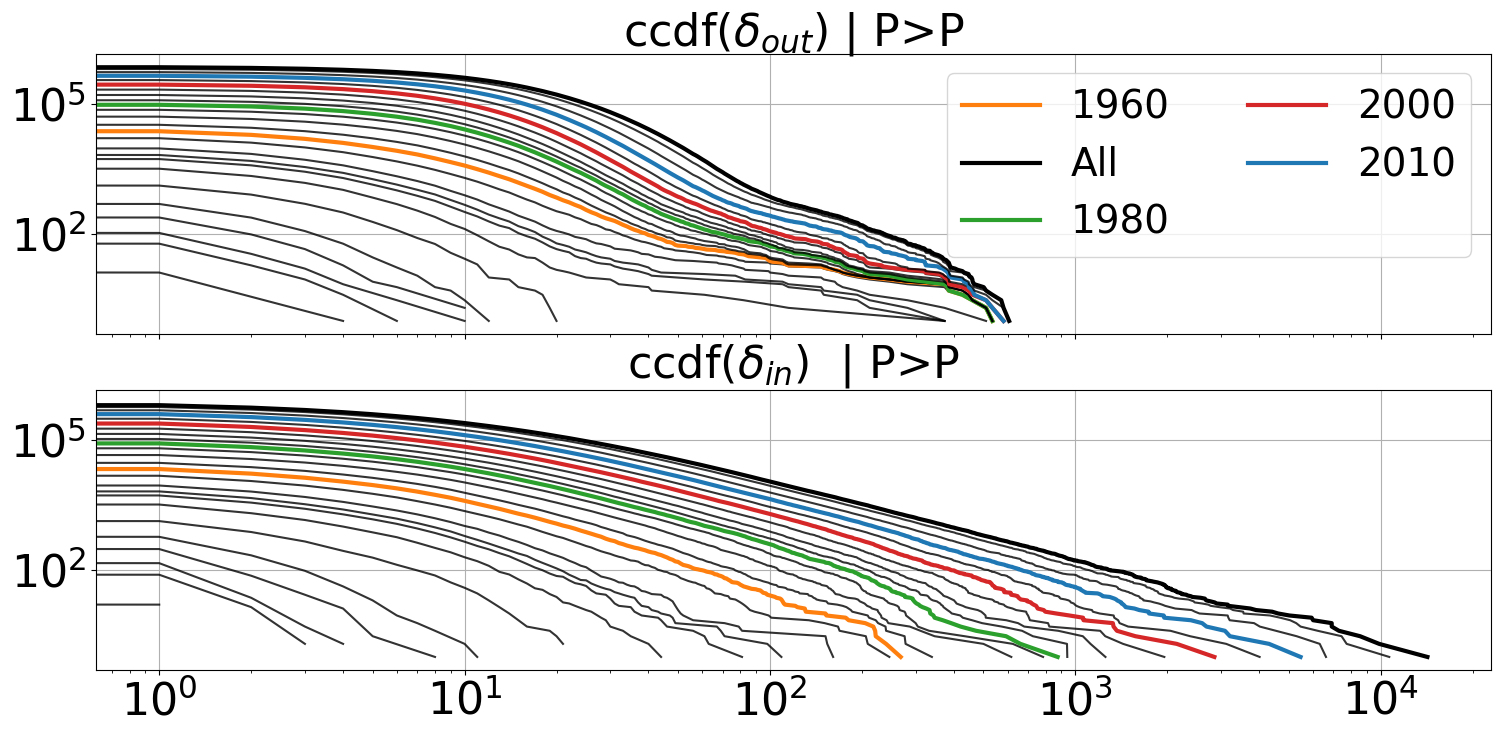

In [20]:
if DisplayStat:
    filename=exportpath+"degreeInOutHisto_APS_year_1900_2030.pkl"
    dout,din=pickle.load(open(filename,"rb"))
    print("dout.keys()",dout.keys())
    print("din.keys() ",din.keys())
    nfig=2
    fontsize=FontSize[nfig]

    # ccdf or df
    if True:
        field,key=('ccdf',"ccdf")
    else:
        field,key=('y',"df")


    ColorList=["tab:orange","tab:green","tab:red","tab:blue","k","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"]
    ColorList=ColorList[:len(YearList)]

    #for s in dout.keys():
    for s in dout.keys():
        # ONLY FOCUS on "O>O" (others are empty)
        print("-"*80)
        fig, axs = plt.subplots(nfig,figsize=(18,4*nfig),sharex=True)   
        for i in [0,1]:
            axs[i].grid()
            axs[i].set_yscale("log")
            axs[i].set_xscale("log")
            axs[i].tick_params(axis='both',which='major',labelsize=FontSize[nfig])

        for year in dout[s].keys():
            if year in YearList:
                c=ColorList[np.where(np.array(YearList)==year)[0][0]]
                label=str(year)
                if year==3000:
                    label="All"
                if len(dout[s][year]["x"])!=1:
                    axs[0].plot(dout[s][year]["x"],dout[s][year][key],markersize=0.5,c=c,lw=3,label=label)
                else:
                    axs[0].scatter(dout[s][year]["x"],dout[s][year][key],s=3,c=c,lw=3,label=label)

                if len(din[s][year]["x"])!=1:
                    axs[1].plot(din[s][year]["x"],din[s][year][key],markersize=0.5,c=c,lw=3,label=label)
                else:
                    axs[1].scatter(din[s][year]["x"],din[s][year][key],s=3,c=c,lw=3,label=label)


            else:
                if len(dout[s][year]["x"])!=1:
                    axs[0].plot(dout[s][year]["x"],dout[s][year][key],markersize=0.5,c="k",alpha=0.8)
                else:
                    axs[0].scatter(dout[s][year]["x"],dout[s][year][key],s=0.5,c="k",alpha=0.8)
                if len(din[s][year]["x"])!=1:
                    axs[1].plot(din[s][year]["x"],din[s][year][key],markersize=0.5,c="k",alpha=0.8)
                else:
                    axs[1].scatter(din[s][year]["x"],din[s][year][key],s=0.5,c="k",alpha=0.8)

        axs[1].set_title(field+r'$(\delta_{in})$  | '+s,fontsize=fontsize)
        axs[0].set_title(field+r'$(\delta_{out})$ | '+s,fontsize=fontsize)
        axs[0].legend(loc='upper right',fontsize=fontsize-4,ncol=2,markerscale=2)
        plt.show()

## e) Discussion

In the context of this study, we observe that:
- The evolution of the ratio of new edges to new nodes displays a clear regime shift starting around 1985.
- The behavior of the out-degree distribution shows a structural change inconsistent with the assumption of stationarity:
  - The gap between the ccdf for different years is not constant in log-log scale. Hence, they cannot be reduced to a simple proportionality factor independent of the degree.
  - The maximum out-degree hardly increases over time.

These observations indicate that the commonly used assumption in earlier studies — *"The mean value $m$ of the $m_t$'s is constant over time with finite variance as $t$ becomes larger."* — does not hold, at least after 1985.

More broadly, the observation that the average number of new edges grows faster than the number of new nodes calls for discussion (see, for instance, Albert and Barabási, 2001). We restrict ourselves here to two comments:
- In any case, the apparently exponential growth of this average cannot persist indefinitely and must be transient.
- We verified that the patterns observed at the scale of the full dataset are not specific to a single journal.

The increase in this average may have multiple causes. One possible explanation is a shift in citation practices, possibly as a collective response to the growing role of publication metrics in the evaluation of researchers, laboratories, and institutions since the 1955–1975 period — notably with the introduction of impact factors (for both journals and researchers), and later their incorporation into international rankings such as the Shanghai ranking.

See for example:
- Garfield, E. (1955). *Citation indexes for science: A new dimension in documentation through association of ideas*. Science, 122(3159), 108–111. https://doi.org/10.1126/science.122.3159.108  
- Garfield, E., & Sher, I. H. (1975). *Journal Citation Reports: A bibliometric analysis of science journals in the ISI Science Citation Index*. Institute for Scientific Information (ISI), Philadelphia.

A potential source of bias may also arise from the structure of the dataset: it only includes citations made by APS-published articles to other APS-published articles. For a fixed average number of citations per article (across all journals), a growing share of APS publications in the total citation pool would mechanically increase the average number of citations made by APS articles to other APS articles.

One should also highlight the role of the American Institute of Physics, which published its first Style Manual in 1951 and helped standardize and promote the use of citations as a means of attributing scientific authorship.
- American Institute of Physics, *AIP Style Manual*, 4th ed. (American Institute of Physics, New York, 1990), https://en.wikipedia.org/wiki/AIP_style , https://publishing.aip.org/wp-content/uploads/2021/03/AIP_Style_4thed.pdf


Additionally, earlier studies have highlighted and discussed the likely presence of aging effects and the existence of distinct evolution rules for highly cited articles.


One question is whether the topological partitioning used in this study provides insight:
- into the actual onset of the exponential growth of the number of nodes;
- and into the existence of implicit subcategories that may help better understand the evolution rules.


## f) Topological Partioning

In the case of the dataset derived from the SoftwareHeritage project, partitioning the nodes according to their out-degree revealed the existence of a regime in which the average number of outgoing edges per node remained constant, provided that nodes with no outgoing links ($\delta_{out}=0$) were separated from the rest (see Figure 3 of the article).

One may ask whether a similar topological partitioning in the APS citation data can provide insights into the effective onset date of the regime shift observed around 1985—namely, whether this transition predominantly concerns a specific subset of nodes that may differ in nature, even if this underlying type is not explicitly identified.

To investigate this, the following figure shows the number of new nodes per month whose out-degree is equal to 0, equal to 1, greater than 10, or greater than 20.

In [7]:
Rebuild=True
if Rebuild:

    NoutThreshold=10
    
    dout=nodes[1:]-nodes[:-1]
    
    
    nodesTSM=timestampsarray2yearmonth(nodesad,EPOCH=EPOCH)
    
    Nhisto_full=np.bincount(nodesTSM)

    mask_dout=dout==0 
    Nhisto_doutThreshold_0=np.bincount(nodesTSM[mask_dout])

    mask_dout=dout==1 
    Nhisto_doutThreshold_1=np.bincount(nodesTSM[mask_dout])

    mask_dout=dout>=NoutThreshold
    Nhisto_doutThreshold_1T=np.bincount(nodesTSM[mask_dout])
    
    mask_dout=dout>=(NoutThreshold*2)
    Nhisto_doutThreshold_2T=np.bincount(nodesTSM[mask_dout])
    

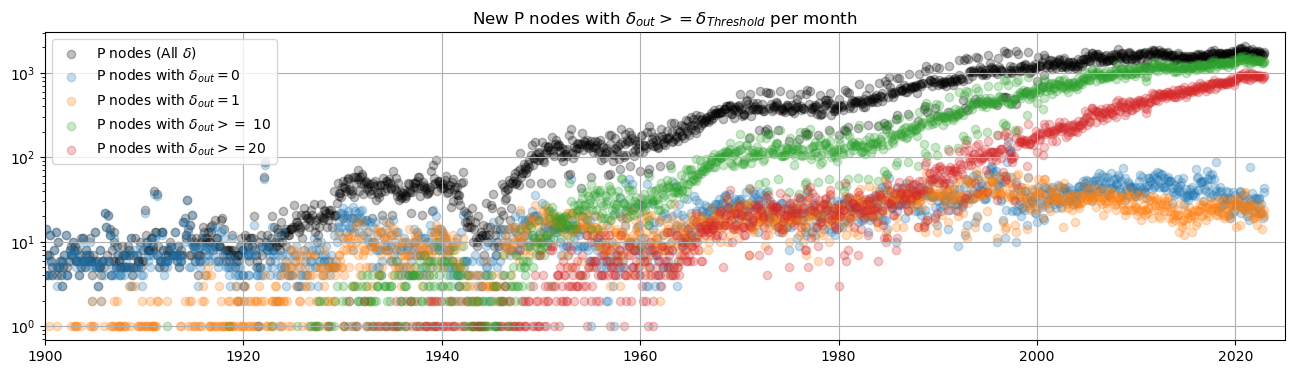

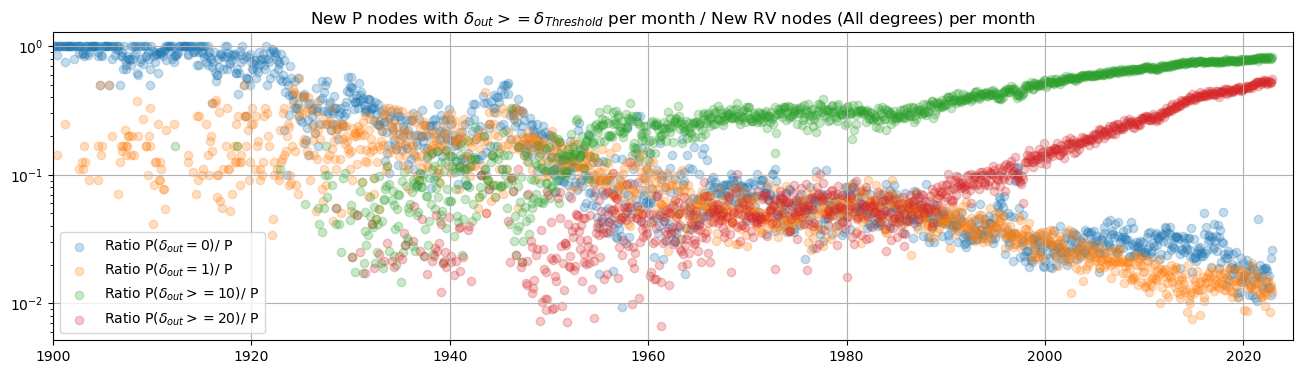

In [9]:
DisplayStat=True
if DisplayStat:
    alpha=0.25
    xrange=np.arange(len(Nhisto_doutThreshold_0))/12+EPOCH2Epoch(EPOCH)
    plt.figure(figsize=(16,4))
    plt.title(r'New P nodes with $\delta_{out}>=\delta_{Threshold}$ per month')
    plt.scatter(xrange,Nhisto_full,c="k",label=r'P nodes (All $\delta$)',alpha=alpha)
    plt.scatter(xrange,Nhisto_doutThreshold_0,label=r'P nodes with $\delta_{out}=0$',alpha=alpha)
    plt.scatter(xrange,Nhisto_doutThreshold_1,label=r'P nodes with $\delta_{out}=1$',alpha=alpha)
    plt.scatter(xrange,Nhisto_doutThreshold_1T,label=r'P nodes with $\delta_{out}>=$ '+str(NoutThreshold),alpha=alpha)
    plt.scatter(xrange,Nhisto_doutThreshold_2T,label=r'P nodes with $\delta_{out}>=$'+str(2*NoutThreshold),alpha=alpha)
    plt.xlim((YearBegin,YearEnd))
    #plt.ylim((1e0,1e8))
    plt.yscale("log")
    plt.grid()
    plt.legend()
    plt.show()


    plt.figure(figsize=(16,4))
    plt.title(r'New P nodes with $\delta_{out}>=\delta_{Threshold}$ per month'+" / New RV nodes (All degrees) per month")
    plt.scatter(xrange,Nhisto_doutThreshold_0/Nhisto_full,label=r'Ratio P($\delta_{out}=0$)/ P',alpha=alpha)
    plt.scatter(xrange,Nhisto_doutThreshold_1/Nhisto_full,label=r'Ratio P($\delta_{out}=1$)/ P',alpha=alpha)
    plt.scatter(xrange,Nhisto_doutThreshold_1T/Nhisto_full,label=r'Ratio P($\delta_{out}>=$'+str(NoutThreshold)+')/ P',alpha=alpha)
    plt.scatter(xrange,Nhisto_doutThreshold_2T/Nhisto_full,label=r'Ratio P($\delta_{out}>=$'+str(2*NoutThreshold)+')/ P',alpha=alpha)
    plt.xlim((YearBegin,YearEnd))
    #plt.ylim((1e-5,1e-1))
    plt.yscale("log")
    plt.grid()
    plt.legend()
    plt.show()


We observe that between 1965 and 1985, the relative proportions of the different node types remain approximately constant. After 1985, however, these proportions become dependent on the nodes' out-degree. In particular, the relative weight of nodes with zero or one outgoing link decreases initially, before appearing to stabilize.

There is no indication that the increase in the average out-degree of new nodes is driven by specific subset; rather, it appears to be a global phenomenon affecting the majority of nodes. As such, it should be interpreted as a structural evolution of the growth process itself. That said, as will be discussed in the next section, nodes with zero or one outgoing link may still warrant special attention.


## g) Out Degree Distribution

The next figure shows the out-degree distributions, based on histograms constructed from articles published in 1960, 1980, 2000, and 2010.

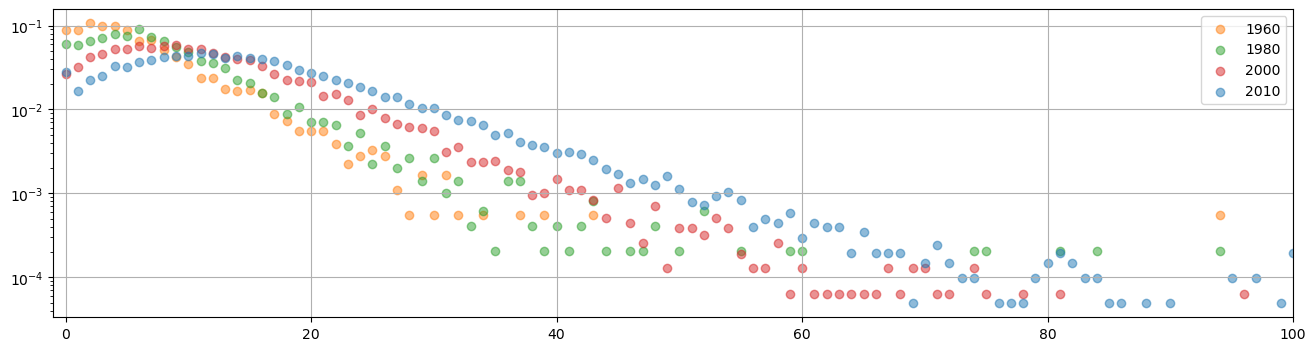

In [10]:
if DisplayStat:
    plt.figure(figsize=(16,4))
    YearListTodo=list(range(YearBegin,YearEnd,1))
    YearListTodo=sorted(list(set(YearListTodo+YearList)))
    ColorList=["tab:orange","tab:green","tab:red","tab:blue","k","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"]
    ColorList=ColorList[:len(YearList)]
    DeltaMonth=6 # mean over 1+2xDeltaMonth
    mean=[]
    median=[]
    var=[]
    Xyear=[]
    dout_year={}
    zeros=[]
    ones=[]
    Ntot=[]
    for year in YearListTodo:
        if year!=3000:
            mask=np.logical_and(
            nodesTSM>=max(0,int(6+12*(year-EPOCH2Epoch(EPOCH)))-DeltaMonth),
            nodesTSM<=int(6+12*(year-EPOCH2Epoch(EPOCH)))+DeltaMonth)
            if np.sum(mask)!=0:
                Xyear.append(year)
    
                mean.append(np.mean(dout[mask]))
                median.append(np.median(dout[mask]))
                var.append(np.var(dout[mask],ddof=1))
            
                Nhisto=np.bincount(dout[mask])
                x=np.arange(len(Nhisto))
                zeros.append(Nhisto[0])
                if 1 in x:
                    ones.append(Nhisto[1])
                else:
                    ones.append(0)
                mask=Nhisto!=0
                x=x[mask]
                y=Nhisto[mask]
                Ntot.append(np.sum(y))
                dout_year[year]={"x":x,"y":y}
                if year in YearList:
                    c=ColorList[np.where(year==np.array(YearList))[0][0]]
                    plt.scatter(x,y/Ntot[-1],label=str(year),c=c,alpha=0.5)
    plt.yscale("log")
    #plt.xscale("log")
    plt.xlim(-1,100)
    plt.grid()
    plt.legend()
    plt.show()


The regularity of the observed distributions makes it possible to conduct a meaningful comparison with standard discrete models. A noteworthy feature is the clear overrepresentation of nodes with zero out-degree, which only becomes apparent once the maximum of the distribution shifts toward higher values. This phenomenon is unlikely to result from random fluctuations alone and instead points to the presence of two distinct structural components within the network. The second component, characterized by a high frequency of zero out-degree nodes, becomes detectable only when the contribution of the first component at zero decreases sufficiently.

This observation raises the possibility that the out-degree distribution results from the superposition of at least two generative mechanisms, each with different underlying dynamics. However, a thorough investigation of their respective origins—as well as the identification of reliable structural or temporal criteria to separate them—falls outside the scope of the present study. For the purposes of this analysis, we restrict ourselves to tracking the evolution of the mean and variance of the overall out-degree distribution, while acknowledging the likely coexistence of multiple components that are not explicitly disentangled here.


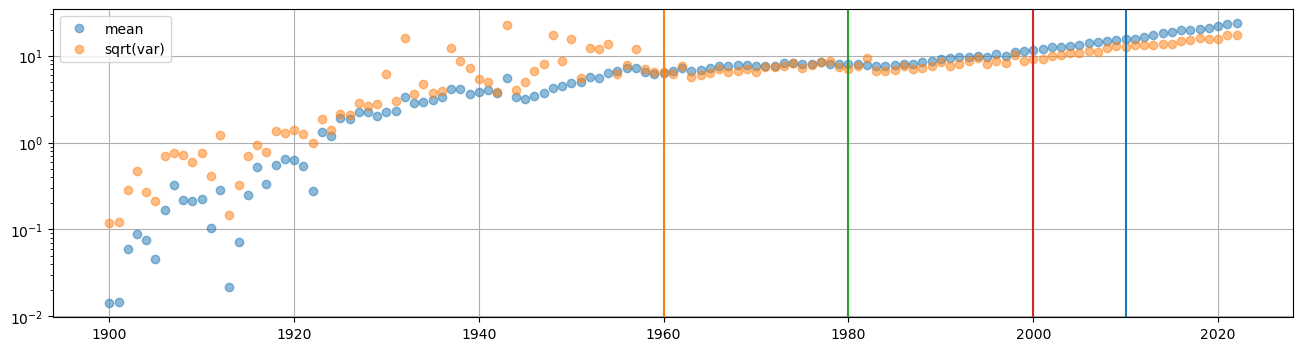

In [11]:
Display=True
if Display:
    mean=np.array(mean)
    var=np.array(var)
    median=np.array(median)
    zeros=np.array(zeros)
    ones=np.array(ones)
    plt.figure(figsize=(16,4))
    plt.plot(Xyear,mean,"o",label="mean",alpha=0.5)
    plt.plot(Xyear,np.sqrt(var),"o",label="sqrt(var)",alpha=0.5)
    for index,year in enumerate(YearList):
        if year!=3000:
            plt.axvline(x=year,c=ColorList[index])
    plt.yscale("log")
    plt.grid()
    plt.legend()
    plt.show()

A regular variation of the first two moments can be observed in the data extracted from the dataset. Moreover, the fact that the square root of the variance remains close to, or slightly below, the mean (starting from 1985—and again, this is stated without explicitly accounting for the likely presence of two components) naturally raises the question of compatibility with standard discrete distributions. In particular, the negative binomial distribution emerges as a relevant candidate, given that it allows for a variance greater than the mean.

For illustrative purposes, we show below the result of a manual fit of a negative binomial distribution to the out-degree distribution extracted from the data for the year 2020, using two hand-tuned parameters.


ok index 120 year 2020 Ntot 23965


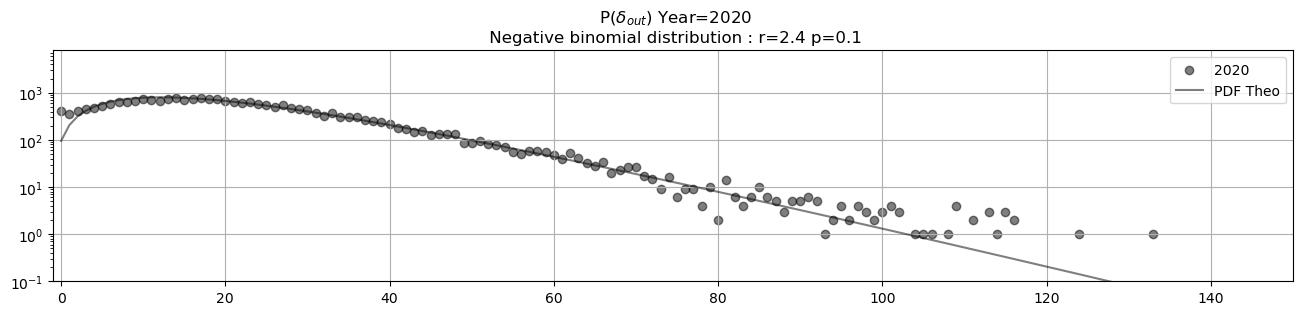

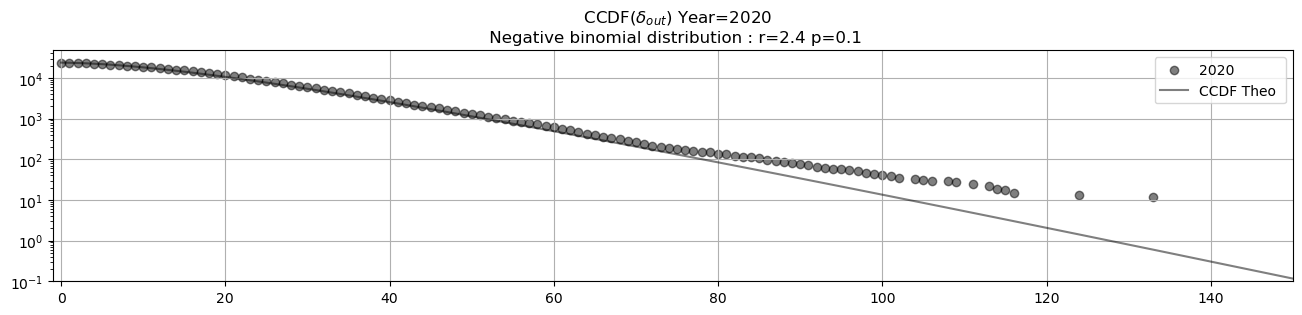

In [15]:
if DisplayStat:
    from scipy.special import gammaln,betainc

    def BinomialNegative_I(x,r,p,N=1):
        return N*np.exp(gammaln(x+r-1+1)-gammaln(x+1)-gammaln(r-1+1))*(1-p)**x*p**r
    
    def CCDF_BinomialNegative_I(x,r,p,N=1):
        return N-N*betainc(r,x+1,p)
    
    r=2.4
    p=0.1
    
    for index,year in enumerate(Xyear):
        # cumulative over 1 month
        if year in [2020]:
            print("ok index",index,"year",year,"Ntot",Ntot[index])
            mask=np.logical_and(
            nodesTSM>=max(0,int(6+12*(year-EPOCH2Epoch(EPOCH)))-DeltaMonth),
            nodesTSM<=int(6+12*(year-EPOCH2Epoch(EPOCH)))+DeltaMonth)
            if np.sum(mask)!=0:

                plt.figure(figsize=(16,3))
                plt.title(r' P($\delta_{out}$) Year='+str(year)+"\n Negative binomial distribution : r="+str(r)+" p="+str(p) )
                x=dout_year[year]["x"]
                y=dout_year[year]["y"]
                z=y/np.sum(y)
                try:
                    c=ColorList[np.where(year==np.array(YearList))[0][0]]
                except:
                    c="k"
                plt.scatter(x,y,label=str(year),c=c,alpha=0.5)
                plt.plot(x,BinomialNegative_I(x,r,p,N=Ntot[index]),label="PDF Theo",c=c,alpha=0.5)
                plt.yscale("log")
                plt.ylim(0.1,Ntot[index]/3)
                plt.xlim(-1,150)
                plt.grid()
                plt.legend()
                plt.show()
                
                plt.figure(figsize=(16,3))
                plt.title(r'  CCDF($\delta_{out}$) Year='+str(year)+"\n Negative binomial distribution : r="+str(r)+" p="+str(p) )
                plt.scatter(x,np.cumsum(y[::-1])[::-1],label=str(year),c=c,alpha=0.5)
                plt.plot(x,CCDF_BinomialNegative_I(x,r,p,N=Ntot[index]),label="CCDF Theo ",c=c,alpha=0.5)
                plt.yscale("log")
                plt.ylim(0.1,Ntot[index]*2)
                plt.xlim(-1,150)
                plt.grid()
                plt.legend()
                plt.show()
 

Despite the empirical and exploratory nature of the approach used—and with all due caution—it is worth noting the overall agreement between the fitted and observed curves, except in the immediate neighborhood of low out-degree values ($\delta_{\text{out}} \le 2$) and in the tail of the distribution, where an excess of high out-degree nodes is observed.

The bias observed for small values of $\delta_{\text{out}}$ is likely attributable to the hypothesized presence of a second component in the distribution, which only becomes distinguishable once the main component has shifted sufficiently toward higher values.

The excess of nodes with large out-degrees can be partially explained by the specificity of certain journals (see preliminary analysis below, particularly for *Reviews of Modern Physics*), but it may also be discussed in relation to the possible existence—or absence—of an upper bound on the number of citations a node can include.

Such questions warrant further investigation, as the statistical properties of the out-degree distributions—including the existence of finite moments and bounded support—may significantly influence the predictions of theoretical models based on minimal assumptions.


In [108]:
if DisplayStat:
    nodesJ,Journals=pickle.load(open('./ImportData/nodesJ_APS_20250618.pkl','rb'))
    
    #print(Journals)
    #print(np.bincount(nodesJ))
    dout=nodes[1:]-nodes[:-1]
    d_10=np.percentile(dout,10)
    d_50=np.percentile(dout,50)
    d_90=np.percentile(dout,90)
    for J,value in Journals.items():
        string=f'{J:12} # nodes {np.sum(nodesJ==value):10,} # edges {np.sum(dout[nodesJ==value]):10,}'
        string+=f' p10 {np.percentile(dout[nodesJ==value],10):5,} p50 {np.percentile(dout[nodesJ==value],50):5,} p90 {np.percentile(dout[nodesJ==value],90):5,}'
        print(string)
        

PR           # nodes     47,940 # edges    291,610 p10   0.0 p50   4.0 p90  14.0
PRA          # nodes     88,357 # edges  1,312,878 p10   3.0 p50  12.0 p90  30.0
PRAB         # nodes      1,566 # edges     12,806 p10   1.0 p50   6.0 p90  18.0
PRAPPLIED    # nodes      5,295 # edges     68,464 p10   2.0 p50  11.0 p90  26.0
PRB          # nodes    207,609 # edges  3,319,398 p10   4.0 p50  13.0 p90  31.0
PRC          # nodes     43,842 # edges    619,355 p10   3.0 p50  11.0 p90  29.0
PRD          # nodes    103,017 # edges  1,638,506 p10   3.0 p50  13.0 p90  33.0
PRE          # nodes     65,626 # edges    696,276 p10   2.0 p50   9.0 p90  22.0
PRFLUIDS     # nodes      3,524 # edges     19,644 p10   0.0 p50   4.0 p90  13.0
PRI          # nodes      1,169 # edges        172 p10   0.0 p50   0.0 p90   0.0
PRL          # nodes    133,694 # edges  1,349,889 p10   1.0 p50   8.0 p90  21.0
PRMATERIALS  # nodes      3,951 # edges     62,661 p10   4.0 p50  14.0 p90  29.0
PRPER        # nodes        

## h) Discussion/Conclusions


The citation dataset from APS journals reveals a significant shift in growth dynamics, challenging the commonly held assumption that the average out-degree per newly added node remains constant over time. This assumption does not hold 
in this dataset, at least from 1985 onward.

In particular:
- This transition can be captured through a temporal evolution of the parameters characterizing the main component of the out-degree distribution
- Any comparison with minimal growth models must account for a change in regime starting in 1985, as well as for a richer initial condition than is typically assumed. Indeed, the network had already evolved significantly since at least 1965, under a different set of growth dynamics prior to the observed transition.
